Evaluate Graph models 

In [172]:
import os
import re
import networkx as nx
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fuzzywuzzy import process
from absl import logging

In [321]:
dataset = 'Thunderbird'
# G = nx.read_gpickle(dataset+'_Bigram.gpickle')
G = nx.read_gpickle(dataset+'sim.gpickle')


In [325]:
for node in sorted(G.nodes()):
    print(node)
len(G.nodes())

<*> DELL <*>
<*> Exp
<*> Net filter core team
<*> Release Date E<*> T <*>
<*> SCSI revision <*>
<*> USB HID core driver
<*> admin <*> relay <*> local host
<*> cache <*>
<*> egistering net filter hooks
<*> ioc <*> initial <*>
<*> mouse device common for all mice
<*> port <*> irq <*>
<*> root ddr root <*> delay <*> delay <*> mailer relay pri <*> relay <*> stat Deferred Connection refused <*>
<*> startup succeeded
<*> t startup succeeded
<*> tarting
Assuming <*> MHz system bus speed for PIO modes override with ide bus
Auto detecting RAID arrays
Cannot open file dev log surfer for writing such file directory
CentOS <*> Kernel Module GPG key
Changing permissions special file dev log surfer
Compressed image found block <*>
Creating Top spin dev entries
DHCP <*> from <*> via eth <*>
DHCP <*> via eth <*>
DHCP DISCOVER from <*> via eth <*><*>
DHCP REQUEST for <*> from <*> via eth <*><*>
Detected <*> MHz processor
Device dev sda Temperature changed <*> Celsius <*> Celsius since last report
Disab

129

Comparing one to one values from our templates to swisslog using  Levenshtein Distance 

In [254]:
def compare_templates(path):
    df =  pd.read_csv(path)
    df.pop(df.columns[0])
    your_list = df.EventTemplate.to_list()
    sim_dict = {} 
    results , sim_list = [] , []
    for element in G.nodes():
        a = process.extractOne(element, your_list) ##COMPARING LINE BY LINE
        sim_dict[element] = a
        results.append(list(a)[1])
        sim_list.append(element)
        sim_list.append(list(a)[0])
    print (" The average similarity between both document is ", np.average(results))
    return sim_list
    
sim_list = compare_templates('../../logs/'+dataset+'/'+dataset+'_2k.log_templates.csv')

 The average similarity between both document is  92.94573643410853


In [310]:
sim_list


['Cannot open file dev log surfer for writing such file directory',
 'Cannot open file /dev/logsurfer for writing (No such file or directory)',
 '<*> admin <*> relay <*> local host',
 '<*>: from=root, size=<*>, class=<*>, nrcpts=<*>, msgid=<<*>>, relay=#<*>#@localhost',
 'Starting permissive mode',
 'Starting in permissive mode',
 'not detected',
 'RNG not detected',
 'Using for IRQ routing',
 'Using ACPI for IRQ routing',
 'assuming drive cache write through',
 'assuming drive cache: write through',
 'eth <*> watchdog NIC Link <*> Mbps Full Duplex',
 'allocating divert_blk for eth<*>',
 'Disabled runtime',
 'Disabled at runtime.',
 'time reset <*>',
 'time reset +<*>.<*> s',
 'Subsystem revision <*>',
 'Subsystem revision <*>',
 'Trace cache <*> ops <*> cache <*>',
 'Trace cache: <*> uops, L1 D cache: <*>',
 'unable qualify own domain name admin <*> using short name',
 'unable to qualify my own domain name (<*>) -- using short name',
 "Now running <*> ' privileges",
 "Now running on #

Now we compare semantic similariy visualizing in a heatmap the first 10 templates using sentence encoder model from google

In [234]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


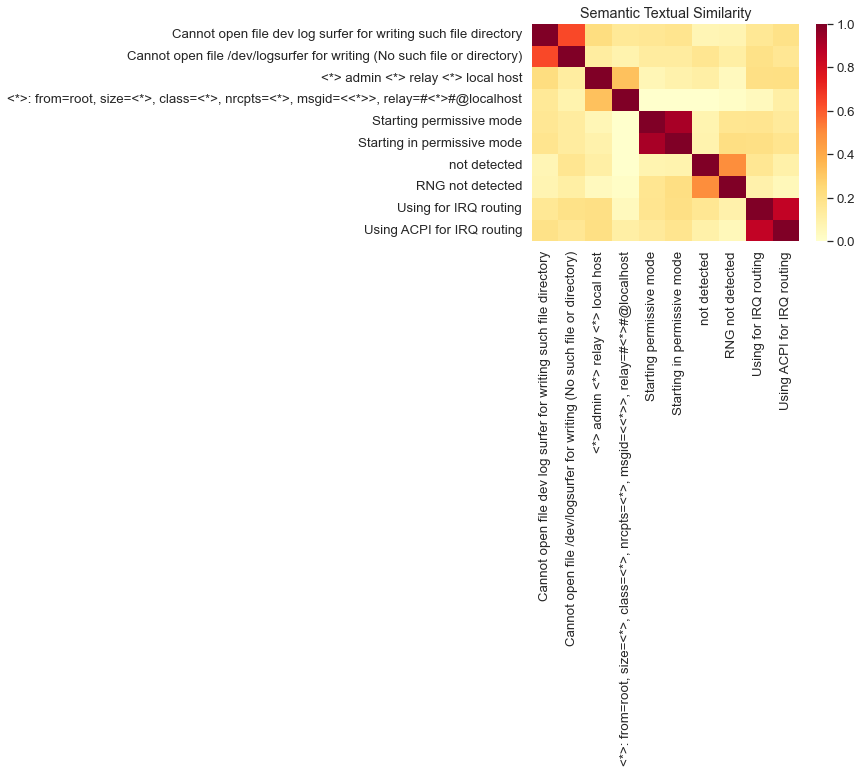

In [308]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_[0:10], message_embeddings_[0:10], 90)

run_and_plot(sim_list)

Betweenes centrality  to measure  to identify nodes that play a central role in the communication structure of a graph. From this we gathered the nodes in the case of the bigrams graph the most frequents and for the semantic similarity graph we understand the  actions that are most done in the systems gaining more insights in the system

In [256]:
# get words corresponding to nodes (in scoring order)
node_scores = nx.betweenness_centrality(G)
sorted_node_scores = dict(sorted(node_scores.items(), key=lambda item: -item[1]))
sorted_nodes = list(sorted_node_scores.keys())

# candidate KW = highest scoring nodes (1/3 of all nodes)
candidate_kw = sorted_nodes[:int(len(sorted_nodes)/3)]
candidate_kw

['mounted filesystem with ordered data mode',
 'Using IOA PIC for interrupt routing',
 'DHCP REQUEST for <*> from <*> via eth <*><*>',
 'Assuming <*> MHz system bus speed for PIO modes override with ide bus',
 'Probing PCI hardware bus <*>',
 'error Bind port <*> failed Address already use',
 'PCI Interrupt <*>',
 'Using for IRQ routing',
 'asking for cache data failed',
 'sweep <*> configuration change required',
 'update var lib ganglia rds <*> illegal attempt update using time <*> when last update time <*> minimum one second step',
 'Registering secondary module capability',
 'Reading included configuration file etc net <*> line <*>',
 'Warning failed resolve data source name <*>',
 'initialized',
 'not allocating divert for non ethernet device<*>',
 'Subsystem revision <*>',
 'Using software bounce buffering for SWI OTL',
 'Installing public key data',
 'initializing net link socket disabled',
 'Server listening port <*>',
 'net Version <*> started with lib wrap load avg options co

function return  The Jaccard coefficient  used to identify similar vertices in the graph, community detection and link prediction. 

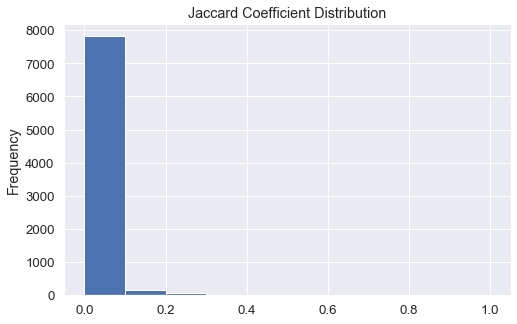

In [257]:
def get_jaccard_coefficients(graph):
    return pd.DataFrame(sorted(list(nx.jaccard_coefficient(graph)),
                        key=lambda x: x[-1], reverse=True),
                        columns=["source", "target", "jaccard_coefficient"])

jaccard_coefficients_df = get_jaccard_coefficients(G)
try:
    jaccard_coefficients_df.jaccard_coefficient.plot.hist(bins=10, figsize=(8,5), 
                                                      title="Jaccard Coefficient Distribution");
except:
    print("Strongly connected graph")

Link predicion : We get common neigbors betweeen two nodes and visualize it
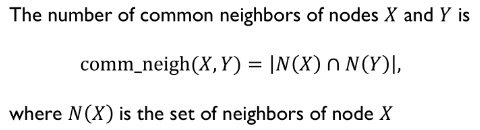

In [258]:
# function to return the subgraph containing 2 nodes' common neighbors
def get_common_neighbor_subgraph(graph, source, target):
    nodes = [source, target] + list(nx.common_neighbors(G, source, target))
    return graph.subgraph(nodes)


# function create node color list for likely connected two nodes with their
# common neighbors
def create_source_target_colors(graph, source, target):
    nodes = list(graph.nodes())
    potential_connected_node_colors = ["#EFD1BB"] * len(nodes)
    for index in range(len(nodes)):
        if nodes[index] in [source, target]:
            potential_connected_node_colors[index] = "#F47315"
    return potential_connected_node_colors


def visualize_likely_connected_nodes(graph, source, target):
    # get subgraph
    subgraph = get_common_neighbor_subgraph(G, source, target)

    # create visualization
    node_colors = create_source_target_colors(subgraph, source, target)
    title = dataset + f" Graph {source} and {target}"
    pos = nx.spring_layout(subgraph, k=0.3, iterations=50, seed=2)

    plt.figure(1, figsize=(10, 6))
    nx.draw(
        subgraph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )
    plt.title(title)
    plt.show()


In [264]:
# function to return a node's neighbor nodes as a list
def get_neighbors(graph, node):
    return [n for n in graph.neighbors(node)]
get_neighbors(G, candidate_kw[1])

['Using for IRQ routing',
 'error Bind port <*> failed Address already use',
 'Initializing',
 'Using PET based timekeeping',
 'Using software bounce buffering for SWI OTL',
 'Using configuration type <*>',
 'not allocating divert for non ethernet device<*>',
 'DHCP REQUEST for <*> from <*> via eth <*><*>',
 'asking for cache data failed',
 'Using CONFIG <*>',
 'Registering secondary module capability',
 'mounted filesystem with ordered data mode',
 'unqualified host name admin <*> unknown sleeping for retry',
 '<*> mouse device common for all mice',
 'sweep <*> configuration change required']

In [314]:
jaccard_coefficients_df.head(10)    

,source,target,jaccard_coefficient
0,version <*> bios version <*>,PIC <*> pic <*> enabled,1.0
1,connection lost ' Connection closed ',Started working <*> available service,1.0
2,<*> t startup succeeded,succeeded,1.0
3,Logic Mega RAID driver,Model <*> SCSI Rev <*>,1.0
4,<*> cache <*>,Hash tables configured established <*> bind <*>,0.5
5,DHCP <*> via eth <*>,START ftp pid <*> from <*>,0.5
6,DHCP <*> via eth <*>,Received SNMP packet from <*>,0.5
7,DHCP <*> via eth <*>,connection from <*>,0.5
8,Processor CPU <*> supports <*>,Detected <*> MHz processor,0.5
9,bus <*> bus irq <*> global irq <*> l,Assuming <*> MHz system bus speed for PIO mode...,0.5


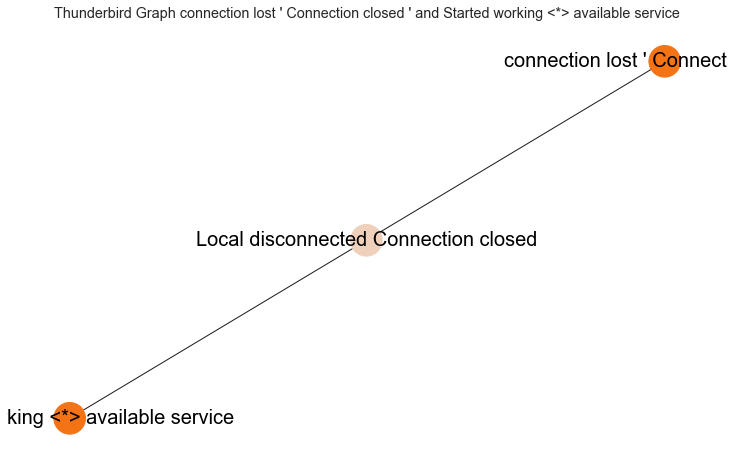

In [317]:
visualize_likely_connected_nodes(G, jaccard_coefficients_df.source[1], jaccard_coefficients_df.target[1])

resource allocation index for link predicrion,  One observation is that two potentially connected nodes with many connections will have resource allocation index greater than 1 when their neighbors have less common neighbors. In this way, the percentage of resources allocated will be higher per common neighbor nodes.

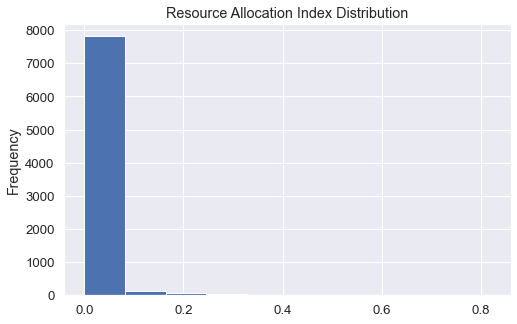

In [322]:
# function return the resource allocation index dataframe sorted by the
# resource allocation index value
def get_resource_allocation_index(graph):
    return pd.DataFrame(sorted(list(nx.resource_allocation_index(graph)),
                        key=lambda x: x[-1], reverse=True),
                        columns=["source", "target", "resource_allocation_index"])

resource_allocation_index_df = get_resource_allocation_index(G)
if len(resource_allocation_index_df) >1 :
    resource_allocation_index_df.resource_allocation_index.plot.hist(bins=10, figsize=(8,5), 
        title="Resource Allocation Index Distribution");
else:
    print("Strongly connected graph")

In [324]:
resource_allocation_index_df.head()
resource_allocation_index_df.to_clipboard()

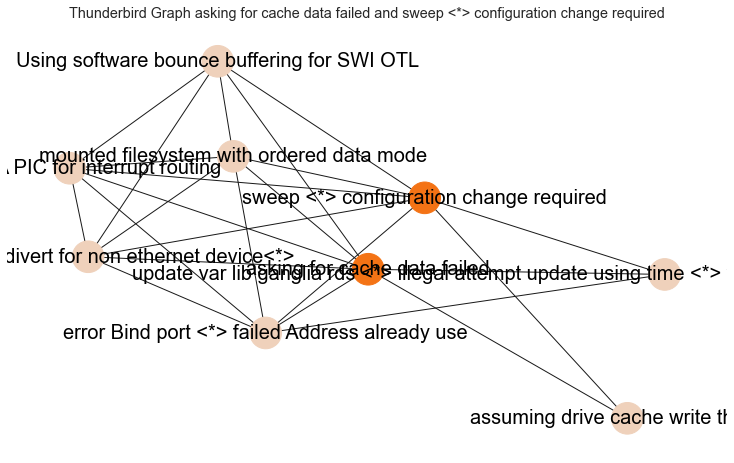

In [320]:
visualize_likely_connected_nodes(G, resource_allocation_index_df.source[0], 
resource_allocation_index_df.target[0])

In [267]:


def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Average Cluster Coefficients:", nx.average_clustering(graph))
    print("Connected components:", len(list(nx.connected_components(graph))))
get_graph_info(G)


Number of nodes: 129
Number of edges: 180
Average Cluster Coefficients: 0.23578851901985318
Connected components: 52


In [306]:


# function create node color list for less than 7 communities
# when there are more than 6 colors, visualization can be confusing for human
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#EF9A9A", "#BA68C8", "#64B5F6", "#81C784",
              "#FFF176", "#BDBDBD"]*number_of_colors
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=False,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 


In [305]:
import community as community_louvain



# convert the python-louvain package output to 
# NetworkX package community function output format
def get_louvain_communities(graph, random_state=1):
    louvain_partition_dict = community_louvain.best_partition(graph, random_state=random_state)
    unique_partition_labels = list(set(louvain_partition_dict.values()))
    communities = [[] for i in range(len(unique_partition_labels))]
    for node in louvain_partition_dict.keys():
        communities[louvain_partition_dict[node]].append(node)
    return communities

# get communities using louvain algorithm
louvain_communities = get_louvain_communities(G, random_state=1)
len(louvain_communities)

56

In [307]:
visualize_communities(G, louvain_communities[0])

NotAPartition: Graph with 129 nodes and 180 edges is not a valid partition of the graph ['Cannot open file dev log surfer for writing such file directory', 'not detected', 'assuming drive cache write through', 'time reset <*>', 'IOA PIC <*> address <*> xfe <*> gsi base <*>', 'error Bind port <*> failed Address already use', 'Warning failed resolve <*> admin <*> admin <*>', 'kernel time sync <*> abled <*>', '<*> port <*> irq <*>', 'update var lib ganglia rds <*> illegal attempt update using time <*> when last update time <*> minimum one second step', '<*> root ddr root <*> delay <*> delay <*> mailer relay pri <*> relay <*> stat Deferred Connection refused <*>', 'Server listening port <*>', 'data thread got not answer from any nder bird <*> data source', 'asking for cache data failed', 'Wait for ready failed before probe', 'probe ves afb <*> failed with error <*>', 'Changing permissions special file dev log surfer']